In [1]:
#import all the necessary packages
import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes

from sklearn.metrics import r2_score

%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import importlib as imp

import FactorModelLibForMOOC as fm #the code that wraps around the sikitlearn implementations
import config_demo_final as config


import warnings
warnings.filterwarnings('ignore')

In [2]:
all_data = pd.read_csv(config.dataPath)
all_data[config.dateName] = pd.to_datetime(all_data[config.dateName])
all_data = all_data[all_data['Date'] <= '2014-12-01'].copy()

In [3]:
all_data.head()

,Date,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection,U.S. Equity,SP500 Total Return,S&P 500,International Equity,U.S. Treasury 20 years,Corporate Bond,Real Estate,Commodity,TIPS
0,1995-01-01,-0.020349,0.022922,0.032048,0.006524,-0.003404,0.022239,0.025954,0.025897,-0.039228,0.025987,0.017042,-0.014847,-0.023908,0.029446
1,1995-02-01,0.010680,0.030014,0.013531,-0.038375,-0.020587,0.036258,0.035540,0.038974,-0.000434,0.026960,0.029870,0.032460,0.002221,-0.008361
2,1995-03-01,0.045804,0.007195,0.025871,-0.023184,-0.042060,0.030791,0.035454,0.029502,0.061949,0.009477,0.011937,-0.005961,0.019558,-0.015989
3,1995-04-01,0.036372,0.016973,0.030836,-0.003600,-0.015827,0.022403,0.026256,0.029414,0.037154,0.017695,0.010995,0.002259,0.038085,0.013373
4,1995-05-01,0.011040,0.054900,0.006743,-0.054282,0.009121,0.036521,0.040894,0.039949,-0.009769,0.076715,0.053217,0.045025,-0.009417,0.000618


In [4]:
startDate = all_data[config.dateName].min()
endDate = all_data[config.dateName].max()

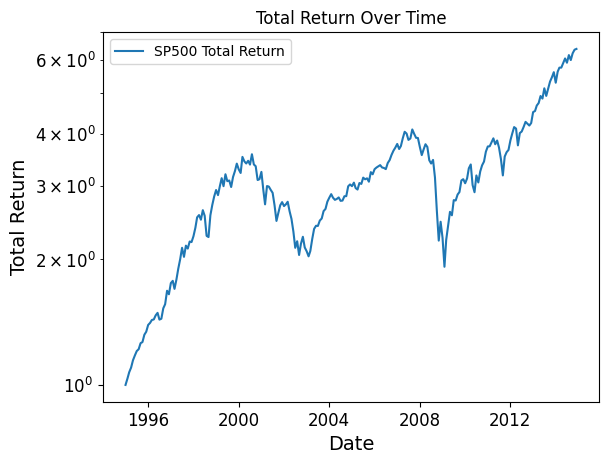

In [5]:
name = 'SP500 Total Return'
fm.plot_returns(all_data, name, flag='Total Return')

In [6]:
Y = all_data[[name]]
X = all_data[config.factorName]

In [7]:
from sklearn.linear_model import LinearRegression

m1 = LinearRegression().fit(X,Y)

In [9]:
m1.coef_

array([[ 1.0205201 ,  0.12849675, -0.00390603, -0.01058991,  0.39668339]])

In [14]:
#Q8
data = X.copy()
data['10-year US Treasuries'] = data['10-year US Treasuries']+(1/100)
data['10-year US Treasuries']

0      0.032922
1      0.040014
2      0.017195
3      0.026973
4      0.064900
         ...   
235    0.028782
236   -0.000631
237    0.023129
238    0.024195
239    0.011414
Name: 10-year US Treasuries, Length: 240, dtype: float64

In [15]:
model_OLS = LinearRegression(fit_intercept=True).fit(data,Y)

In [16]:
loadings = model_OLS.coef_

In [20]:
config.factorName

['World Equities',
 '10-year US Treasuries',
 'High Yield',
 'Inflation Protection',
 'Currency Protection']

In [21]:
#Answer
loadings[0][1]

0.12849674581609732

In [22]:
#Q9
from sklearn.linear_model import Lasso
model_005 = Lasso(alpha=0.005,fit_intercept=True)
model_005.fit(X,Y)
model_005.coef_ 

array([ 0., -0.,  0.,  0., -0.])

In [23]:
model_000005 = Lasso(alpha=.000005,fit_intercept=True)
model_000005.fit(X,Y)
model_000005.coef_ 

array([ 1.00970408,  0.11292032,  0.        , -0.        ,  0.37153629])

In [25]:
#Grid Search Practice
from sklearn.model_selection import GridSearchCV
alpha = [{'alpha':[0.000005]}]
lasso_model = Lasso(fit_intercept=True)

clf = GridSearchCV(lasso_model,alpha,cv=5,refit=True)
clf.fit(X,Y)

GridSearchCV(cv=5, estimator=Lasso(), param_grid=[{'alpha': [5e-06]}])

In [29]:
clf.best_estimator_

Lasso(alpha=5e-06)

In [30]:
clf.best_score_

0.8502393460557857